# 2DRubik's Cube 1.0

###### May 25, 2020

In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageColor
from matplotlib import pyplot as plt
import random
# Required Packages


CUBE0 = np.array(9*["R"]+9*["G"]+9*["O"]+9*["B"]+9*["Y"]+9*["W"]).reshape(6,3,3)
# Defines a (solved) cube as an numpy array.

"""Main"""

def Main():
    """This function Simulartes the exerience of solving a Rubix Cube. Have fun."""
    flag = True # Flag to signal Main() when to end.
    CUBE=CUBE0.copy() #Creates a cube.
    Roll,CUBE = randomizer(CUBE0) #Scrambles the Cube. No back door for cheating oppened.
    Cheat(Roll) # Nothing_to_see_here!
    graphics(CUBE) # Displays the Cube for the user.
 
    while flag: # Loops input, exectution and display.

        user_input = INPUT() # Takes input.
        user_input = parse_input(user_input) # Turns input into a list usable by movit.
        CUBE, flag = moveit(CUBE,user_input,flag) # Excutes the moves in the list.
        if (CUBE == CUBE0).all(): # Winning condition. Checks if the Cube is solved.
            graphics(CUBE)
            print("Congradulations!")
            flag = False # terminate while loop.
            
    return ()


"""Shuffle Cube"""
def randomizer(CUBE0):
    """Suffles the Cube."""
    CUBE = CUBE0.copy()
    ReverseMoveDic = {"F":"f","B":"b","U":"u","D":"d","L":"l", "R":"r",\
                   "f":"F","b":"B","u":"U","d":"D","l":"L","r":"R"}
    
    Roll = random.choices(["F","f","B","b","U","u","D","d","L","l", "R","r"],[1]*12,k=20) # 20 = God's number.
    #Randomly Chooses 20 moves. It has been recently proved that any cube can be solved with 20 moves or less.
    for i in range(len(Roll)):
        if i != 0: # makes sure the previous current move doesn't just undo the previous move.
                while ReverseMoveDic[Roll[(i-1)]] == Roll[i]:
                    Roll[i] = random.choices(["F","f","B","b","U","u",\
                                            "D","d","L","l", "R","r"],\
                                             [1]*12,k=1)[0]
# Exectues the 20 moves.        
        if Roll[i] == "F":
            CUBE = FC(CUBE)
        elif Roll[i] == "f":
            CUBE = FCC(CUBE)
        elif Roll[i] == "B":
            CUBE = BC(CUBE)
        elif Roll[i] == "b":
            CUBE = BCC(CUBE)
        elif Roll[i] == "U":
            CUBE = UC(CUBE)
        elif Roll[i] == "u":
            CUBE = UCC(CUBE)
        elif Roll[i] == "D":
            CUBE = DC(CUBE)
        elif Roll[i] == "d":
            CUBE = DCC(CUBE)
        elif Roll[i] == "L":
            CUBE = LC(CUBE)
        elif Roll[i] == "l":
            CUBE = LCC(CUBE)
        elif Roll[i] == "R":
            CUBE = RC(CUBE)
        elif Roll[i] == "r":
            CUBE = RCC(CUBE)        
    return(Roll,CUBE)


def Solve(Roll):
    """Not for cheating. Strictly for varification purpuses"""
    # Creates a string of the moves that undo the randomizer: A Solution Combonation.
    Solvecode = []
    for i in Roll:
        if  i.islower():
            Solvecode.append(i.upper())
        if  i.isupper():
            Solvecode.append(i.lower())
    Solvecode.reverse()
    solved_string = "".join(Solvecode)
    return(solved_string)

def Cheat(Roll):
    """Nothing To See Here"""
    """Does NOT print solutions into a txt file."""
    with open('Nothing_to_see_here.txt', 'w') as f:
        f.write('Roll: \n')
        for i in Roll:
            f.write(i)
        f.write('\n solution: \n')
        f.write(Solve(Roll))
    #print("solution: ",Solve(Roll)) # "Cheat" could also print solution in prompt.
    


"""GRAPHICS"""

def graphics(CUBE):

    im = Image.new('RGB', (800, 800), (128, 128, 128))
    draw = ImageDraw.Draw(im)
   

    Front,Right,Back,Left,Up,Down = get_faces(CUBE)

    # Left 
    start=[44,400,94,450]
    drawface_H(np.copy(Left),start,draw, True)
    
    # Front
    start=[start[0]+156,400,start[2]+156,450]
    front_cord = start.copy()
    drawface_H(np.copy(Front),start,draw)
    
    # Right
    start=[start[0]+156,400,start[2]+156,450]
    drawface_H(np.copy(Right),start,draw)

    # Back
    start=[start[0]+156,400,start[2]+156,450]
    drawface_H(np.copy(Back),start,draw,True)
    
    # Up
    start=[front_cord[0],240,front_cord[2],290]
    drawface_V(np.copy(Up),start,draw)

    # Down
    start=[front_cord[0],start[1]+312+5,front_cord[2],start[3]+312+5]
    drawface_V(np.copy(Down),start,draw, True)
    
    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(im)
    plt.show()


def get_faces(CUBE):
     return CUBE[0],CUBE[1],CUBE[2],CUBE[3],CUBE[4],CUBE[5]

def drawface_H(face,start,draw,flip = False):
    
    if flip: 
        face = swap_col(face)
    color_dict = {"G":'green','R':'red','Y':'yellow','O':'orange','W':'white','B':'blue'}
    
    outline =ImageColor.getcolor('black', 'RGBA')
    

    for x in range(3):
        x_0 = start[0]
        x_1 = start[2]
        y_0 = start[1] + (50*x) 
        y_1 = start[3] + (50*x)
        for y in range(3):
            face_color = ImageColor.getcolor(color_dict[face[x,y]], 'RGBA')
            
            draw.rectangle((x_0, y_0, x_1, y_1), fill=face_color, outline=outline)
            x_0 = x_0 + 50 + 1
            x_1 = x_1 + 50 + 1

def drawface_V(face,start,draw, flip = False):
    
    if flip:
        face = swap_row(face)
    color_dict = {"G":'green','R':'red','Y':'yellow','O':'orange','W':'white','B':'blue'}
    
    outline =ImageColor.getcolor('black', 'RGBA')
    

    for x in range(3):
        x_0 = start[0]
        x_1 = start[2]
        y_0 = start[1] + (50*x) + 1
        y_1 = start[3] + (50*x) + 1
        for y in range(3):
            face_color = ImageColor.getcolor(color_dict[face[x,y]], 'RGBA')
            
            draw.rectangle((x_0, y_0, x_1, y_1), fill=face_color, outline=outline)
            x_0 = x_0 + 50 + 1
            x_1 = x_1 + 50 + 1
    
"""Input"""

def INPUT():
    """Displays prompt for player and records player input."""
    possible_inputs = np.array(["F","f","B","b","U","u","D","d","L","l","R","r"])
    print("Please Move Cube: \n \
                   Possible Moves: \n", possible_inputs)
    Input = input("Enter possible moves as a string, include 'Q' or 'q' to quit\n");
    return(Input)

def split(word):
    """split a string into a list of characters"""
    return [char for char in word]  
    
def parse_input(user_input):
    """process user input: keep valid moves single characters in a list."""
    possible_moves = np.array(["Q", "q", "F","f","B","b","U","u","D","d","L","l","R","r"])
    user_moves = []
    invalid_moves = []
    #user_input = input('Enter possible moves as a string:') # intake as a string
    # split the string into characters
    for char in split(user_input):
        # if not a possible move, do not store in list and warn user
        if char in possible_moves:
            user_moves.append(char)
        else:
            invalid_moves.append(char)
    if len(set(invalid_moves)) > 0:
        print(set(invalid_moves), 'are not valid moves, therefore not accepted.')
    return user_moves
    
"""Moves"""

def moveit(CUBE,user_input,flag): 
    """ Executes Moves in Main """
    
    for Input in user_input: # Runs the appropriate move for every  
        if Input == "F":     # element in the user_input list.
            CUBE = FC(CUBE)
        elif Input == "f":
            CUBE = FCC(CUBE)
        elif Input == "B":
            CUBE = BC(CUBE)
        elif Input == "b":
            CUBE = BCC(CUBE)
        elif Input == "U":
            CUBE = UC(CUBE)
        elif Input == "u":
            CUBE = UCC(CUBE)
        elif Input == "D":
            CUBE = DC(CUBE)
        elif Input == "d":
            CUBE = DCC(CUBE)
        elif Input == "L":
            CUBE = LC(CUBE)
        elif Input == "l":
            CUBE = LCC(CUBE)
        elif Input == "R":
            CUBE = RC(CUBE)
        elif Input == "r":
            CUBE = RCC(CUBE)
        elif Input.upper() == "Q":
            # flag set to false to terminate outter while loop
            flag = False
            print("Ending Game, Goodbye.")
            # breaking out of for loop
            break
    # draw cube for every move including winning cube
        graphics(CUBE)
    return(CUBE,flag) # Returns a the cube after the moves have been executed. 

    """The Twelve Possible Moves"""

def FC(CUBE):
    
    # Get all the faces 
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    # 90 degree clockwise rotation on front face
    Front = rotate_clockwise(Front)
    
    front_up = Up[2,:].copy()
    front_down = Down[2,:].copy()
    front_right = np.flip(Right[:,0].copy(),0) 
    front_left = np.flip(Left[:,0].copy(),0)   
    
    Right[:,0] = front_up
    Down[2,:] = front_right  
    Left[:,0] = front_down
    Up[2,:] = front_left
    
    return np.array([Front,Right,Back,Left,Up,Down])
    
def FCC(CUBE):
    
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    # 90 degree anti-clockwise rotation on front face
    Front = rotate_anti_clockwise(Front)
    
    
    front_up    = np.flip(Up[2,:].copy(),0)
    front_down  = np.flip(Down[2,:].copy(),0)
    front_right = Right[:,0].copy()
    front_left  = Left[:,0].copy()
    
    Left[:,0]  = front_up
    Up[2,:]    = front_right  
    Right[:,0] = front_down
    Down[2,:]  = front_left
    
    return np.array([Front,Right,Back,Left,Up,Down])
    

def BCC(CUBE):
    
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Back = rotate_clockwise(Back)
    
    back_up    = Up[0,:].copy()
    back_down  = Down[0,:].copy()
    back_right = np.flip(Right[:,2].copy(),0)
    back_left  = np.flip(Left[:,2].copy(),0)
    
    Right[:,2] = back_up
    Down[0,:] = back_right  
    Left[:,2] = back_down
    Up[0,:] = back_left
    
    return np.array([Front,Right,Back,Left,Up,Down])

def BC(CUBE):
    
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Back = rotate_anti_clockwise(Back)
    
    back_up    = np.flip(Up[0,:].copy(),0) 
    back_down  = np.flip(Down[0,:].copy(),0) 
    back_right = Right[:,2].copy()
    back_left  = Left[:,2].copy()
    
    Left[:,2] = back_up
    Up[0,:] = back_right 
    Right[:,2] = back_down
    Down[0,:] = back_left.copy()
    
    return np.array([Front,Right,Back,Left,Up,Down])

def UC(CUBE):
    
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Up = rotate_clockwise(Up)
     
    up_front = np.flip(Front[0,:].copy(),0)
    up_back  = np.flip(Back[0,:].copy(),0)
    up_right = Right[0,:].copy()
    up_left  = Left[0,:].copy()
    
    Right[0,:] = up_back
    Front[0,:] = up_right  
    Left[0,:] = up_front
    Back[0,:] = up_left
    
    return np.array([Front,Right,Back,Left,Up,Down])
    
def UCC(CUBE):
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Up = rotate_anti_clockwise(Up)
    
    up_front = Front[0,:].copy()
    up_back  = Back[0,:].copy()
    up_right = np.flip(Right[0,:].copy(),0)
    up_left  = np.flip(Left[0,:].copy(),0)
    
    Right[0,:] = up_front
    Front[0,:] = up_left  
    Left[0,:] = up_back
    Back[0,:] = up_right
    
    return np.array([Front,Right,Back,Left,Up,Down])
    

def DC(CUBE):
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Down = rotate_anti_clockwise(Down)
    
    down_front = Front[2,:].copy()
    down_back  = Back[2,:].copy()
    down_right = np.flip(Right[2,:].copy(),0)
    down_left  = np.flip(Left[2,:].copy(),0)
    
    Left[2,:] = down_back
    Back[2,:] = down_right  
    Right[2,:] = down_front
    Front[2,:] = down_left
    
    return np.array([Front,Right,Back,Left,Up,Down])
  
def DCC(CUBE):
    
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Down = rotate_clockwise(Down)
    
    down_front = np.flip(Front[2,:].copy(),0)
    down_back  = np.flip(Back[2,:].copy(),0)
    down_right = Right[2,:].copy()
    down_left  = Left[2,:].copy()
    
    Left[2,:] = down_front
    Back[2,:] = down_left  
    Right[2,:] = down_back
    Front[2,:] = down_right
    
    return np.array([Front,Right,Back,Left,Up,Down])

def LC(CUBE):
    
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Left = rotate_anti_clockwise(Left)
    
    left_front = np.flip(Front[:,0].copy(),0)
    left_back  = np.flip(Back[:,0].copy(),0)
    left_up =  Up[:,0].copy()
    left_down  = Down[:,0].copy()
    
    Down[:,0] = left_front
    Up[:,0] = left_back 
    Front[:,0] = left_up
    Back[:,0] = left_down 
    
    return np.array([Front,Right,Back,Left,Up,Down])

def LCC(CUBE):
    
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Left = rotate_clockwise(Left)
    
    left_front = Front[:,0].copy()
    left_back  = Back[:,0].copy()
    left_up =  np.flip(Up[:,0].copy(),0)
    left_down  = np.flip(Down[:,0].copy(),0)
    
    Down[:,0] = left_back
    Up[:,0] = left_front 
    Front[:,0] = left_down
    Back[:,0] = left_up
    
    return np.array([Front,Right,Back,Left,Up,Down])
    

def RC(CUBE):
    
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Right = rotate_clockwise(Right)
    
    right_front = Front[:,2].copy()
    right_back  = Back[:,2].copy()
    right_up =  np.flip(Up[:,2].copy(),0)
    right_down  = np.flip(Down[:,2].copy(),0)
    
    Up[:,2] = right_front
    Down[:,2] = right_back 
    Back[:,2] = right_up
    Front[:,2] = right_down 
    
    return np.array([Front,Right,Back,Left,Up,Down])

    
def RCC(CUBE):
    Front,Right,Back,Left,Up,Down = get_faces(CUBE)
    
    Right = rotate_anti_clockwise(Right)
    
    left_front = np.flip(Front[:,2].copy(),0)
    left_back  = np.flip(Back[:,2].copy(),0)
    left_up =  Up[:,2].copy()
    left_down  = Down[:,2].copy()
    
    Up[:,2] = left_back
    Down[:,2] = left_front 
    Back[:,2] = left_down
    Front[:,2] = left_up
    
    return np.array([Front,Right,Back,Left,Up,Down])
    
    """Move Subfunctions"""
    
def swap_col(face): # For display 
    
    face = face.copy()
    col1 = face[:,0].copy()
    face[:,0] = face[:,2] # Put col3 in col1 
    face[:,2] = col1
    
    return face

def swap_row(face): # For display 
    
    # Swap row 1 & 2 
    face = face.copy()
    row1 = face[0,:].copy()
    face[0,:] = face[2,:] # Put row3 in row1 
    face[2,:] = row1
    
    return face 
    
def rotate_clockwise(face):
    
    face= face.T
    
    # Swap column 1 & 2 
    col1 = face[:,0].copy()
    face[:,0] = face[:,2] # Put col3 in col1 
    face[:,2] = col1
    
    return face 

def rotate_anti_clockwise(face):
    
    face = face.T
    
    # Swap row 1 & 2 
    row1 = face[0,:].copy()
    face[0,:] = face[2,:] # Put row3 in row1 
    face[2,:] = row1
    
    return face 

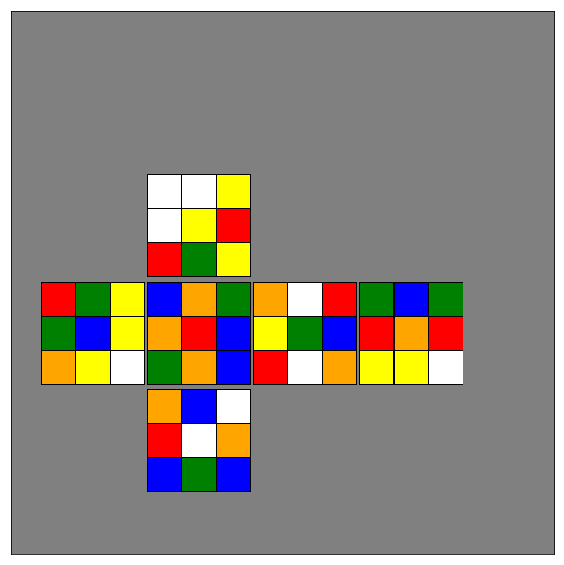

Please Move Cube: 
                    Possible Moves: 
 ['F' 'f' 'B' 'b' 'U' 'u' 'D' 'd' 'L' 'l' 'R' 'r']
Enter possible moves as a string, include 'Q' or 'q' to quit
RFfubdo
{'o'} are not valid moves, therefore not accepted.


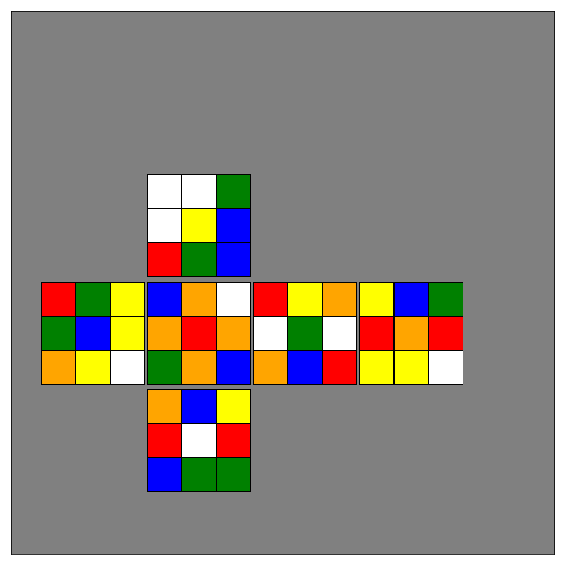

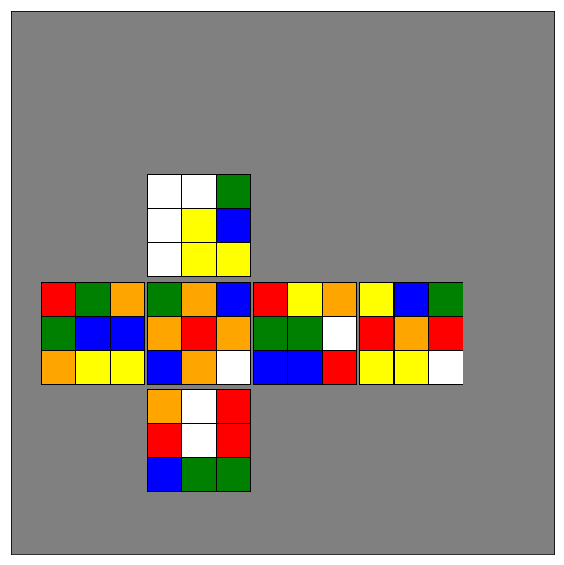

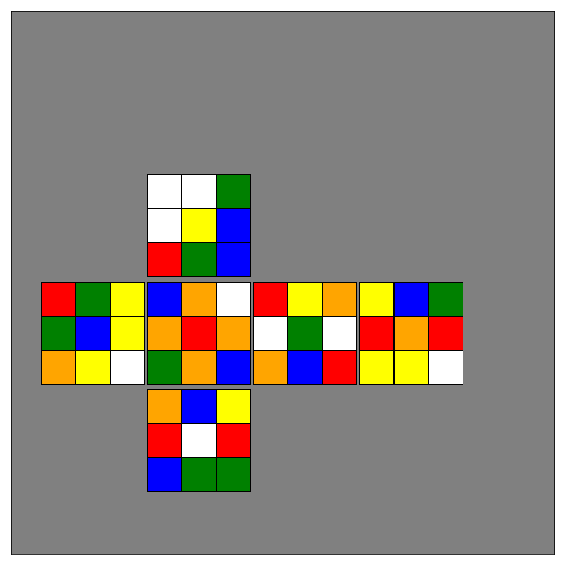

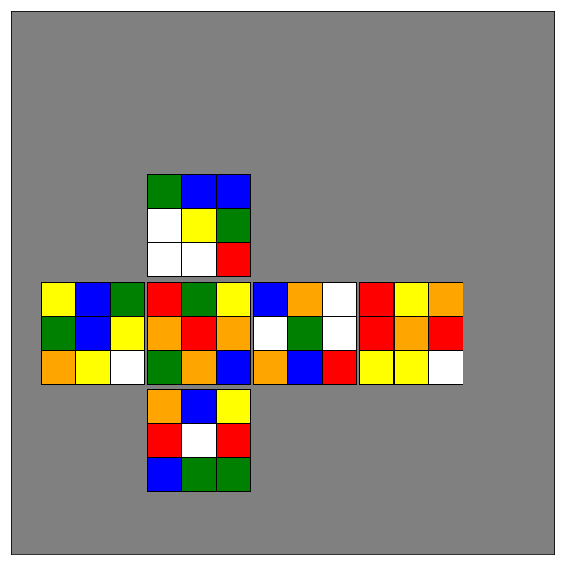

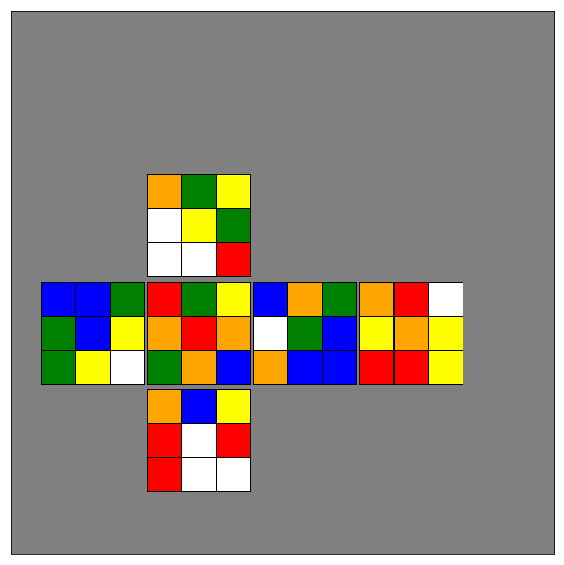

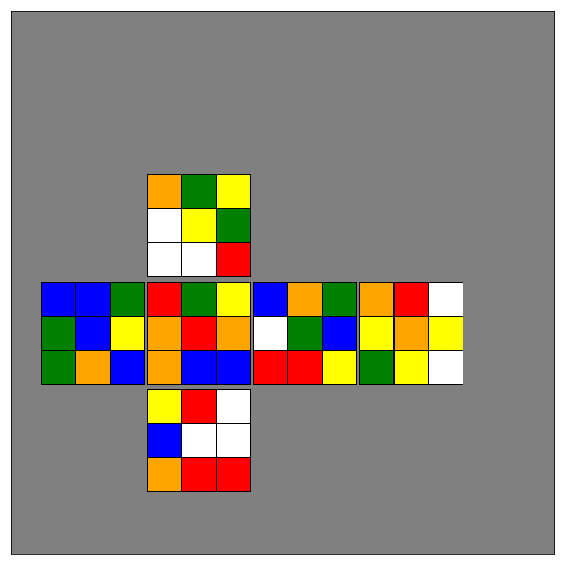

Please Move Cube: 
                    Possible Moves: 
 ['F' 'f' 'B' 'b' 'U' 'u' 'D' 'd' 'L' 'l' 'R' 'r']


In [ ]:
Main()